In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('pdf', fonttype=42)

In [2]:
df = pd.read_parquet('../data/integrated/GANSLIDER_NASATLX_TABLE.parquet')
df['answer'] = df['answer'].astype(int)

cat_type = pd.CategoricalDtype(["1", "2", "3", "4", "5", "8", "10"], ordered=True)
df['num_sliders'] = df['num_sliders'].astype(str).astype(cat_type)

df


,question,psess_id,pstudy_id,taskid,sess_id,pid,id,answer,PROLIFIC_PID,num_sliders,slider_type,GROUP,completed
0,How physically demanding was the task?,60f2c7707ee6e50e2ee62251,60f0287709c3374c4013c3b7,dde540e6-679b-40bb-a3d3-523f209cea33,0f3b93c3-ed75-4598-b219-be640fa6e313,60f0a788a42c34d42df5aa31,04f60ac0-9d55-4860-96f7-41333081fc5b,0,60f0a788a42c34d42df5aa31,8,FILMSTRIP,B,DONE
1,How hard did you have to work to accomplish yo...,60f2c7707ee6e50e2ee62251,60f0287709c3374c4013c3b7,dde540e6-679b-40bb-a3d3-523f209cea33,0f3b93c3-ed75-4598-b219-be640fa6e313,60f0a788a42c34d42df5aa31,d6d02f76-5bc7-4c72-884f-332185a5d78e,9,60f0a788a42c34d42df5aa31,8,FILMSTRIP,B,DONE
2,How hurried or rushed was the pace of the task?,60f2c7707ee6e50e2ee62251,60f0287709c3374c4013c3b7,dde540e6-679b-40bb-a3d3-523f209cea33,0f3b93c3-ed75-4598-b219-be640fa6e313,60f0a788a42c34d42df5aa31,c6b6c6fc-131d-4dcb-99d7-c86c9166f89b,0,60f0a788a42c34d42df5aa31,8,FILMSTRIP,B,DONE
3,How mentally demanding was the task?,60f2c7707ee6e50e2ee62251,60f0287709c3374c4013c3b7,dde540e6-679b-40bb-a3d3-523f209cea33,0f3b93c3-ed75-4598-b219-be640fa6e313,60f0a788a42c34d42df5aa31,52d0bda2-cefe-4ad9-9186-ee17ddbded11,4,60f0a788a42c34d42df5aa31,8,FILMSTRIP,B,DONE
4,How successful were you in accomplishing what ...,60f2c7707ee6e50e2ee62251,60f0287709c3374c4013c3b7,dde540e6-679b-40bb-a3d3-523f209cea33,0f3b93c3-ed75-4598-b219-be640fa6e313,60f0a788a42c34d42df5aa31,5239aee7-4ef9-4cd9-9780-ac01f0597e0e,12,60f0a788a42c34d42df5aa31,8,FILMSTRIP,B,DONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11605,How hard did you have to work to accomplish yo...,60fac47ccdd79cd084826dc9,60f928ceda0f48bf7a1b2dec,eee89be1-ad64-4d31-ad66-361bde8d7284,a6d26d2c-cd9d-4560-bec7-e0c5dbcbf00c,5eb7094fbb8ed70b61398cff,6e8b3d5e-2e6b-4467-a108-d5b7ebf7dd76,15,5eb7094fbb8ed70b61398cff,2,REGULAR,B,DONE
11606,How mentally demanding was the task?,60fac47ccdd79cd084826dc9,60f928ceda0f48bf7a1b2dec,eee89be1-ad64-4d31-ad66-361bde8d7284,a6d26d2c-cd9d-4560-bec7-e0c5dbcbf00c,5eb7094fbb8ed70b61398cff,35aec184-73e5-4d92-a057-69d3672fd31c,15,5eb7094fbb8ed70b61398cff,2,REGULAR,B,DONE
11607,How physically demanding was the task?,60fac47ccdd79cd084826dc9,60f928ceda0f48bf7a1b2dec,eee89be1-ad64-4d31-ad66-361bde8d7284,a6d26d2c-cd9d-4560-bec7-e0c5dbcbf00c,5eb7094fbb8ed70b61398cff,558d6d62-75db-40e3-90c8-14f6ed0a1564,0,5eb7094fbb8ed70b61398cff,2,REGULAR,B,DONE
11608,How hurried or rushed was the pace of the task?,60fac47ccdd79cd084826dc9,60f928ceda0f48bf7a1b2dec,eee89be1-ad64-4d31-ad66-361bde8d7284,a6d26d2c-cd9d-4560-bec7-e0c5dbcbf00c,5eb7094fbb8ed70b61398cff,a9287f8d-bcbc-47a8-9f34-5ad507069590,0,5eb7094fbb8ed70b61398cff,2,REGULAR,B,DONE


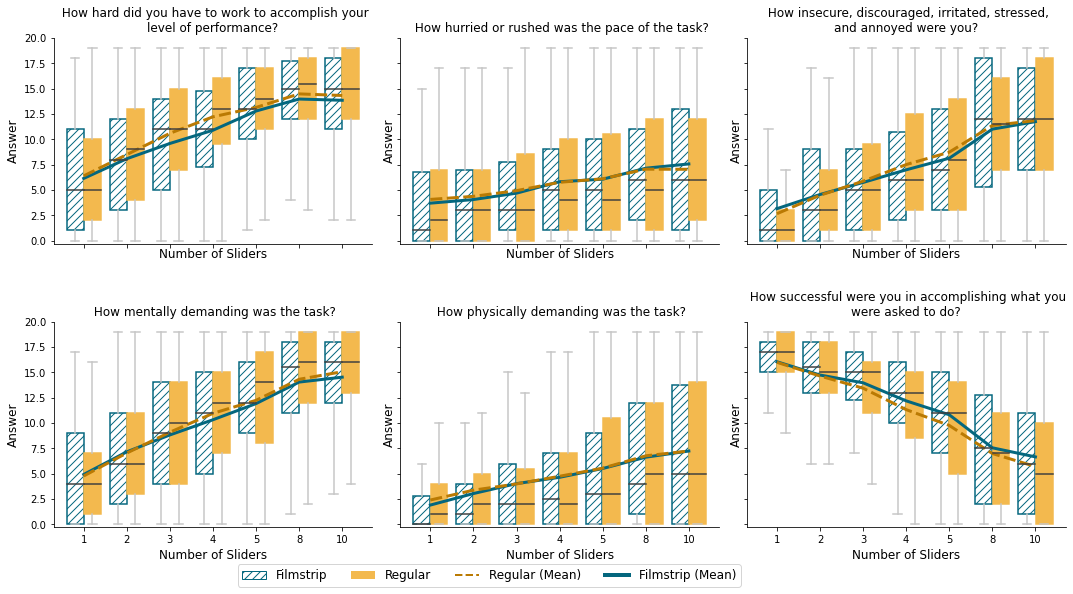

In [3]:
questions = df.groupby('question')


fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True,
                         squeeze=True, figsize=(15, 8))

axes = axes.reshape(-1)
i = 0

for gi, gv in questions:
    gv = gv.rename(columns={
        "answer": "Answer",
        "num_sliders": "Number of Sliders",
    })
    gv['slider_type'] = gv['slider_type'].apply(lambda val: val.lower().capitalize())

    ax = axes[i]
    ax.set_ylim(-0.3, 20)

    sns.despine()
    boxes = sns.boxplot(x='Number of Sliders', y='Answer', hue='slider_type', data=gv, ax=ax, showfliers=False)
    
    # Define some hatches
    hatches = ['///', '']

    # Loop over the bars
    for j,box in enumerate(boxes.artists):
        box.set_facecolor('#F3B94E'if j%2 else "white")
        box.set_edgecolor('#F3B94E'if j%2 else "#04677E")
        
        # Set a different hatch for each bar
        box.set_hatch(hatches[j % 2])

    for j, line in enumerate(boxes.lines):
        if j % 5 != 4:
            line.set_color("#C6C6C6")

    sns.lineplot(x='Number of Sliders', y='Answer', hue='slider_type', style='slider_type', palette=["#04677E", "#BA7A03"], data=gv, ax=ax, linewidth=3, ci=None)


    title = gi.split(' ')
    new_title = ''
    count = 1
    for t in title:
        if len(new_title + ' ' + t) <= count * 50:
            new_title = new_title + ' ' + t
        else:
            new_title = new_title + '\n' + t
            count += 1
    ax.set_title(new_title)
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    ax.get_legend().remove()
    i += 1

patches = [
    matplotlib.patches.Patch( edgecolor="#04677E", hatch=r'///',label='Filmstrip', fill=False),
    matplotlib.patches.Patch( facecolor='#F3B94E', label='Regular'),
    matplotlib.lines.Line2D([0], [0], color='#BA7A03', lw=2,label='Regular (Mean)', linestyle='dashed'),
    matplotlib.lines.Line2D([0], [0], color='#04677E', lw=4,label='Filmstrip (Mean)'),
]

fig.tight_layout(h_pad=3)

plt.legend(handles=patches, bbox_to_anchor=(0, -.15), fontsize=12, ncol=4)
plt.savefig(f'../images/Figure7_nasa_tlx.pdf', bbox_inches="tight")